<a href="https://colab.research.google.com/github/mbpoloni/projeto_pandas/blob/main/pandas_analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas para análise de dados

In [1]:
#importando a biblioteca
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_projeto_pandas/Gapminder.csv", delimiter=";", error_bad_lines=False)
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
df = df.rename(columns={"country":"Country", "continent":"Continent","year":"Year", "lifeExp":"LifeExp", "pop":"Population", "gdpPercap":"GDPPercap"})

In [ ]:
df.head()

,Country,Continent,Year,LifeExp,Population,GDPPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
df.shape

(3312, 6)

In [ ]:
df.dtypes

Country        object
Continent      object
Year            int64
LifeExp       float64
Population      int64
GDPPercap     float64
dtype: object

In [ ]:
df.describe()

,Year,LifeExp,Population,GDPPercap
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [ ]:
oceania = df.loc[df["Continent"]=="Oceania"]
oceania.head()

,Country,Continent,Year,LifeExp,Population,GDPPercap
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


In [ ]:
df.groupby("Continent")["Country"].nunique()

Continent
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Country, dtype: int64

In [ ]:
df.groupby("Year")["LifeExp"].mean()

Year
1950    62.002568
1951    65.904167
1952    49.206867
1953    66.674563
1954    67.459817
1955    67.806757
1956    67.950637
1957    51.614590
1958    68.815936
1959    68.226579
1960    68.470837
1961    68.862480
1962    54.035234
1963    69.595735
1964    70.063105
1965    70.259881
1966    70.447526
1967    56.263629
1968    70.689081
1969    70.653896
1970    70.961141
1971    71.103976
1972    58.474481
1973    71.500338
1974    71.778504
1975    71.939218
1976    72.158050
1977    60.429090
1978    72.717567
1979    73.018717
1980    73.064524
1981    73.337399
1982    62.365871
1983    73.787778
1984    74.100741
1985    74.112222
1986    74.452222
1987    63.984860
1988    74.760000
1989    74.924444
1990    74.283437
1991    74.374848
1992    65.008443
1993    74.324545
1994    74.456667
1995    74.552727
1996    75.029394
1997    65.873799
1998    75.569697
1999    75.703636
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921563
2005 

# Trabalhando com excel


In [2]:
# Leitura dos arquivos excel
df1 = pd.read_excel("/content/drive/MyDrive/dataset_projeto_pandas/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/dataset_projeto_pandas/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/dataset_projeto_pandas/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/dataset_projeto_pandas/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/dataset_projeto_pandas/Salvador.xlsx")

In [5]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [13]:
#Verificar o tipo de dados das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
#Alterar o tipo de dado da coluna
df["LojaID"] = df["LojaID"].astype("object")

In [15]:
#consultar valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
#substituir os valores nulos pela media
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#apagar valores nulos do dataframe
df.dropna(inplace=True)

In [ ]:
#apagar as linhas com valores nulos com base em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#apagar linhas que estejam com valores faltantes em toda a linha
df.dropna(how="all", inplace=True)

In [18]:
#criar coluna
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
#exibe o top 3 maiores com base em algum criterio
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [20]:
#exibe o top 5 menores com base em algum criterio
df.nsmallest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [21]:
#agrupar por criterio
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [22]:
#ordenar conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# Trabalhando com datas

In [26]:
#transformar para datetime
df["Data"] = pd.to_datetime(df["Data"])

In [27]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [28]:
#criar colunas de dias e mes
df["Dia"], df["Mes"] = (df["Data"].dt.day, df["Data"].dt.month)
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Dia,Mes
6,Aracaju,2018-01-01,35.50,1522,2,71.00,1,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2,3
61,Fortaleza,2019-01-01,37.41,1002,5,187.05,1,1
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,1,1
141,Natal,2019-01-02,9.08,1036,1,9.08,2,1
182,Salvador,2019-01-02,6.60,1037,2,13.20,2,1
72,Salvador,2019-01-01,149.47,1036,3,448.41,1,1
59,Natal,2018-01-15,369.00,853,2,738.00,15,1
89,Salvador,2019-01-01,17.46,1034,1,17.46,1,1
106,Natal,2019-01-02,149.19,1035,2,298.38,2,1


In [30]:
#criar coluna com trimeste
df["Trimestre"] = df["Data"].dt.quarter
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Dia,Mes,Trimestre
151,Salvador,2019-01-02,14.63,1035,1,14.63,2,1,1
103,Recife,2019-01-01,41.65,982,3,124.95,1,1,1
46,Aracaju,2018-01-01,41.42,1522,2,82.84,1,1,1
212,Salvador,2019-01-02,50.73,1037,3,152.19,2,1,1
69,Recife,2019-01-01,38.83,981,1,38.83,1,1,1
94,Salvador,2019-01-01,33.24,1037,1,33.24,1,1,1
233,Natal,2019-01-03,172.40,1036,2,344.80,3,1,1
45,Fortaleza,2019-01-01,39.63,1004,3,118.89,1,1,1
121,Recife,2019-03-02,41.55,981,3,124.65,2,3,1
185,Natal,2019-01-02,6.67,1036,1,6.67,2,1,1


In [31]:
#filtrar as vendas de 2019 de mês de marcço
vendas_marco = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [32]:
vendas_marco

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Dia,Mes,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2,3,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2,3,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2,3,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2,3,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2,3,1
...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2,3,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2,3,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2,3,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2,3,1


# Visualização de dados

In [33]:
#contagem de numero de registros
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

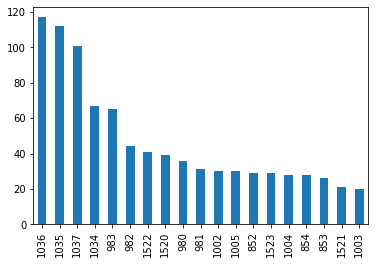

In [41]:
#grafico de barra
df["LojaID"].value_counts(ascending=False).plot.bar();

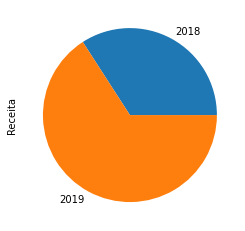

In [40]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

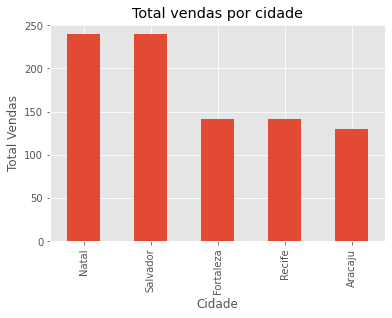

In [43]:
#customizando gráfico
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

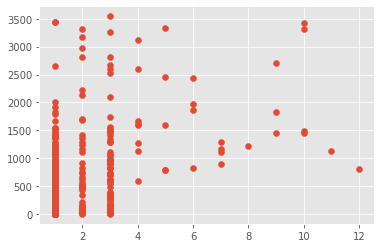

In [45]:
plt.scatter(x=df["Mes"], y=df["Receita"]);

In [ ]:
#salvar imagem grafico
plt.savefig("grafico")